# Doctor's Consultation Fees Prediction
Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATA SETS(train_data)

In [2]:
df=pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
df.shape

(5961, 7)

There is 5961 rows and 7 columns in the dataset.

# CHECKING NULL VALUES IN THE DATASET

In [4]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

There is 3302 missing values in rating column and 2620 missing values in  There is 3302 missing values in rating column and 2620 missing values in  There is 3302 missing values in rating column and 2620 missing values in Miscellaneous_Info column, so the number of missing values is too high so we have to drop both columns. 

# DROPPING UNNECESSARY COLUMNS

In [5]:
del df['Rating']

In [6]:
del df['Miscellaneous_Info']

In [7]:
df.shape

(5961, 5)

In [8]:
df.head()

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,250


Now we can see both the columns has been deleted from the dataset.

# CHECKING DATATYPES OF THE COLUMNS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Place          5936 non-null   object
 3   Profile        5961 non-null   object
 4   Fees           5961 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 233.0+ KB


There is 1 integer datatype column and 4 object datatype column.

#  VISUALIZATION OF CATEGORICAL DATA BY COUNT PLOT

In [10]:
# Visulaization by graph is not possible due to more number of unique values ,so only checking unique values by countplot

In [11]:
print(df['Qualification'].value_counts())

BDS                                                                                              488
BHMS                                                                                             477
BAMS                                                                                             471
MBBS                                                                                             334
MBBS, MS - ENT                                                                                   220
                                                                                                ... 
MBBS, DEMS                                                                                         1
Certified In Panchkarma, Certification In Yoga, Paanchabhautic Ayurveda Certificate, BAMS          1
MD - General Medicine, DM - Critical Care Medicine, Post Graduate Course in Diabetology, MBBS      1
BDS, DMD - Doctor of Dental Medicine                                                       

488 Doctors are BDS and 477 Doctors are BHMS , and there is not much differnce between BDS and BHMS.
MBBS Doctors are 334.

In [12]:
print(df['Experience'].value_counts())

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
66 years experience      1
58 years experience      1
60 years experience      1
64 years experience      1
59 years experience      1
Name: Experience, Length: 64, dtype: int64


Most of the doctors have 9 years of experience showing maximum number of count that is 323, 294 doctors have 10 years of experience, 288 Doctors have 11 years of experience, 282 doctors have 8 years of experience and 279 doctors have 12 years  of experience, and there is not much difference between them.

In [13]:
print(df['Place'].value_counts())

HSR Layout, Bangalore              75
Andheri West, Mumbai               70
Dwarka, Delhi                      67
Banjara Hills, Hyderabad           64
Mulund West, Mumbai                54
                                   ..
Chullickal, Ernakulam               1
Tiruvottiyur, Chennai               1
SG Palya (Kormangla), Bangalore     1
Parassala, Thiruvananthapuram       1
Thudiyalur, Coimbatore              1
Name: Place, Length: 877, dtype: int64


75 doctors are from Bangalore , 70 doctors are from Andheri West Mumbai, 67 doctors are from Dwarka Delhi, 64 doctors are from Banjara Hills Hyderabad  and 54 doctors are from Mulund West Mumbai.  

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


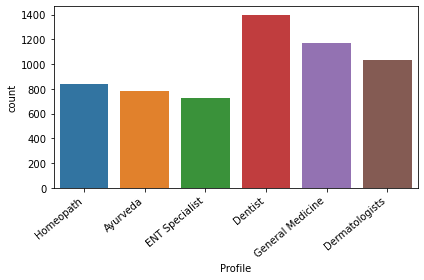

In [14]:
ax=sns.countplot(x='Profile',data=df)
print(df['Profile'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Dentist are maximum that 1397 , doctors with profile of General medicine is 1397, and all the profiles bars is looking approx normal not much difference.

# VISUALIZATION OF INTEGER DATA

<AxesSubplot:xlabel='Fees', ylabel='Density'>

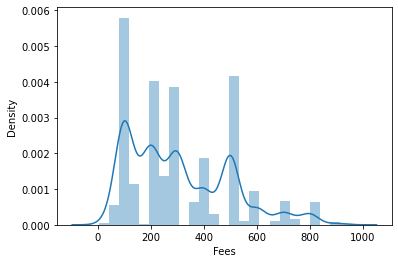

In [15]:
sns.distplot(df['Fees'])

Fees rages from approx 100 to 1000.

# CONVERTING STRING COLUMNS TO NUMERIC COLUMNS

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [18]:

df

,Qualification,Experience,Place,Profile,Fees
0,401,16,299,5,100
1,73,3,866,0,350
2,1135,63,457,3,300
3,464,3,68,0,250
4,10,12,337,0,250
...,...,...,...,...,...
5956,1075,10,70,3,300
5957,596,26,541,4,100
5958,596,35,216,4,600
5959,943,6,850,4,100


Now object data type column is converted into numeric one.

# CHECKING OUTLIERS

Qualification       AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Experience       AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Place            AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Profile          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Fees             AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
dtype: object

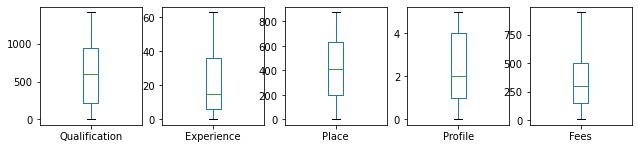

In [19]:
df.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

Outliers are not present in any of the columns.

# CHECKING SKEWNESS

In [20]:
df.skew()

Qualification    0.239720
Experience       0.823531
Place            0.116574
Profile          0.108803
Fees             0.751870
dtype: float64

Skewness is present in Experience and Fees columns, so Experience is the Object data type column and Fees is the target column so skewness cannot be treated.

# CORRELATION MATRIX

In [21]:
cor=df.corr()
cor

,Qualification,Experience,Place,Profile,Fees
Qualification,1.000000,0.003325,0.006321,0.393123,0.263214
Experience,0.003325,1.000000,-0.009908,-0.032711,-0.048529
Place,0.006321,-0.009908,1.000000,0.016631,-0.063510
Profile,0.393123,-0.032711,0.016631,1.000000,0.145226
Fees,0.263214,-0.048529,-0.063510,0.145226,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Qualification'),
  Text(0, 1.5, 'Experience'),
  Text(0, 2.5, 'Place'),
  Text(0, 3.5, 'Profile'),
  Text(0, 4.5, 'Fees')])

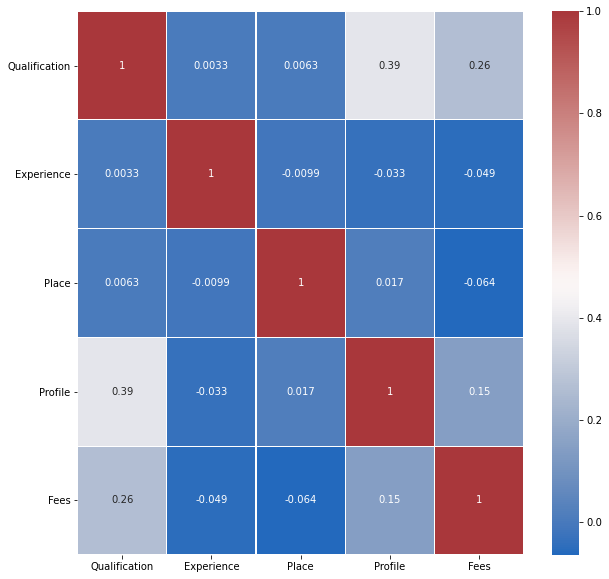

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=.1,cmap="vlag", annot=True, annot_kws={"size": 10})
plt.yticks(rotation=0)

Fess is negatively correlated with Experience and Place.

columns are not showing much correlations with each other.

# LOADING THE DATA SETS(test_data)

In [23]:
df_test=pd.read_excel('Final_Test.xlsx')
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


There is 1987 rows and 6 columns in the dataset and Fees column is missing here.

# CHECKING NULL VALUES IN THE DATASET

In [24]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In Rating column there is 1090 missing values and in Miscellaneous_Info  column there is 834 missing values that is too much , so dropping of both the columns is necessary.

# DROPPING UNNECESSARY COLUMNS

In [36]:
del df_test['Rating']

In [ ]:
del df_test['Miscellaneous_Info']

In [38]:
df_test

,Qualification,Experience,Place,Profile
0,241,28,142,4
1,340,24,580,3
2,258,34,212,2
3,6,0,374,0
4,79,7,231,1
...,...,...,...,...
1982,17,1,58,0
1983,548,33,96,2
1984,474,56,424,4
1985,51,3,26,1


Now we can see both the columns has been dropped.

 # CHECKING DATATYPES OF THE COLUMNS

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Qualification  1987 non-null   int32
 1   Experience     1987 non-null   int32
 2   Place          1987 non-null   int32
 3   Profile        1987 non-null   int32
dtypes: int32(4)
memory usage: 31.2 KB


We have only 4 object data type columns.

 # VISUALIZATION OF CATEGORICAL DATA BY COUNT PLOT

In [40]:
print(df_test['Qualification'].value_counts())

6      153
128    150
51     144
241    107
383     64
      ... 
223      1
222      1
221      1
220      1
629      1
Name: Qualification, Length: 630, dtype: int64


153 doctors are BAMS, 150 doctors are BHMS, 144 doctors are BDS and 107 doctors are MBBS and showing not much difference and BAMS is maximum. 

In [41]:
print(df_test['Experience'].value_counts())

1     110
55     98
56     96
10     92
54     89
2      86
4      83
5      81
3      79
8      72
9      70
52     62
6      57
7      51
44     50
15     49
12     48
13     48
21     46
33     44
14     37
16     34
17     33
22     33
18     32
0      31
20     29
27     27
29     27
19     27
24     26
31     23
23     18
25     16
38     16
34     15
30     14
28     13
32     13
35     12
11     11
26     11
40     11
37     10
36     10
41      9
43      8
39      7
42      6
51      4
45      3
46      3
47      2
49      2
48      1
50      1
53      1
Name: Experience, dtype: int64


Doctors with 10 years experience is maximum and the value counts of these doctors is 110.

In [42]:
print(df_test['Place'].value_counts())

20     27
345    27
124    26
582    23
163    22
       ..
313     1
312     1
311     1
44      1
296     1
Name: Place, Length: 593, dtype: int64


27 Doctors are from Mulund West Mumbai and Andheri West Mumbai.
26 doctors are from Dwarka Delhi , 23 Doctors are from Whitefield Bangalore and 23 doctors are from HSR Layout Bangalore.

Doctors from Mumbai is Maximum.

4    444
1    441
2    339
5    277
0    251
3    235
Name: Profile, dtype: int64


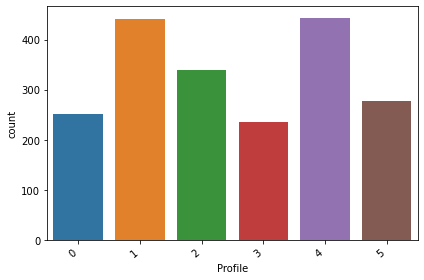

In [43]:
ax=sns.countplot(x='Profile',data=df_test)
print(df_test['Profile'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

444 profiles are General Medicine, 441 Profiles are Dentist, 339 profiles are Dermatologists.
General Medicine is maximum and there is not much difference between other profiles.

# CONVERTING STRING COLUMNS TO NUMERIC COLUMNS

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=le.fit_transform(df_test[i])

In [46]:
df_test

,Qualification,Experience,Place,Profile
0,241,28,142,4
1,340,24,580,3
2,258,34,212,2
3,6,0,374,0
4,79,7,231,1
...,...,...,...,...
1982,17,1,58,0
1983,548,33,96,2
1984,474,56,424,4
1985,51,3,26,1


Now object data type columns has been converted into numeric columns.

# CHECKING OUTLIERS

Qualification       AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Experience       AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Place            AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Profile          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
dtype: object

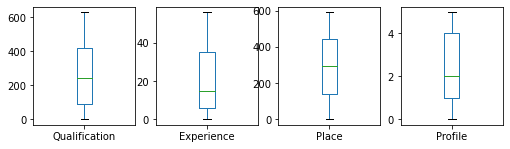

In [47]:
df_test.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

Outliers are not present in any of the column.

# CHECKING SKEWNESS

In [48]:
df_test.skew()

Qualification    0.280822
Experience       0.687595
Place            0.043620
Profile          0.028926
dtype: float64

Skewness is present in Experience column , but is is object column so Skewness cannot be treated.

# CORRELATION MATRIX

In [49]:
df_test.corr()

,Qualification,Experience,Place,Profile
Qualification,1.000000,0.018786,0.020851,0.372002
Experience,0.018786,1.000000,-0.008140,0.017496
Place,0.020851,-0.008140,1.000000,-0.005826
Profile,0.372002,0.017496,-0.005826,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Qualification'),
  Text(0, 1.5, 'Experience'),
  Text(0, 2.5, 'Place'),
  Text(0, 3.5, 'Profile'),
  Text(0, 4.5, 'Fees')])

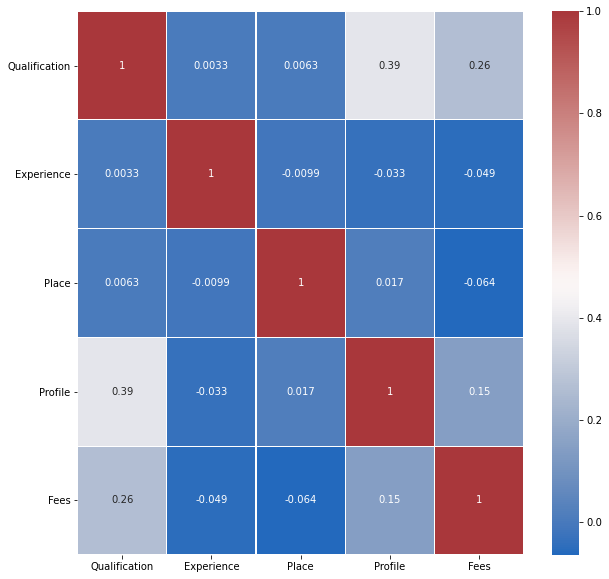

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=.1,cmap="vlag", annot=True, annot_kws={"size": 10})
plt.yticks(rotation=0)

Little bit positive correlations between fees and Qualification

# SPLITTING THE DATASETS(train_data)

In [51]:
x=df.drop('Fees',axis=1)
y=df['Fees']

In [52]:
x.shape

(5961, 4)

In [53]:
y.shape

(5961,)

# TRAIN TEST SPLIT

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=48)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4470, 5)
(1491, 5)
(4470,)
(1491,)


# Lets bring all features to a common scale

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

x=pd.DataFrame(x,columns=df.columns)

 # MODEL BUILDING

In [80]:
# importing libraries
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [81]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 6.637450854236536e-14
mean squared error 7.985833116558483e-27
root mean squared error 8.936348872195222e-14


In [82]:
# Cross validation Linear Regression
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


r2 score is predicting 100% accuracy and cv score is predicting 100% accuracy.

# GRAPHH SHOWING THE PERFORMANCE OF MODEL


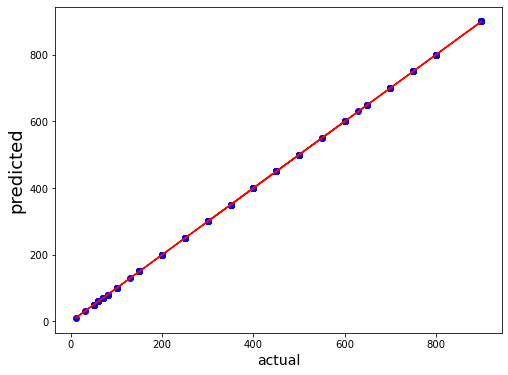

In [83]:
# Linear Regression

plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_y, color='b')
plt.plot(y_test,y_test, color='r')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

Best fit Line is covering most of the data points.

# REGULARIZATION

In [84]:


#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.9999999442168234
error
mean absolute error 0.03753030567805215
mean squared error 0.002125857732388262
root mean squared error 0.04610702476183279


In [85]:
# For Ridge (cross  validation)


score=cross_val_score(rd,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999999621999649


r2 score is predicting 99% and cv score is predicting 99% accuracy score for Ridge

In [86]:
# for Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.9999716940649278
error
mean absolute error 0.8544401378544806
mean squared error 1.0787193312960885
root mean squared error 1.0386141397535895


In [87]:
# For Lasso (cross validation)


score=cross_val_score(ls,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999725129344961


r2 score is predicting 99% and cv score is predicting 99% accuracy score for Lasso

In [88]:

#For ElasticNet



en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.8857726145956352
error
mean absolute error 54.14751169188582
mean squared error 4353.125536566229
root mean squared error 65.97822016822089


In [89]:

#For ElasticNet (cross validation)

score=cross_val_score(en,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.8874913566686271


r2 score is predicting 88% and cv score is predicting 88% accuracy score for Elastic net

# CLASSIFICATION ALGORITHMS A REGRESSION MODEL

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train))

1.0


In [95]:

#For dt (cross validation)

score=cross_val_score(dt,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9999553381907227


Accuracy score is 100% and cv score is 99% of DecisionTreeRegressor.

# ENSEMBLE TECHNIQUE

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [98]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2 score: 99.99857578094353
cross val score 99.996490901609


We are getting model accuracy and cross validation both as 99.99% which shows our model is performing extremly well.

# SAVING THE MODEL

In [99]:
import pickle
filename='doctor_fees.pkl'
pickle.dump(rf, open(filename,'wb'))

# CONCLUSION 1

In [100]:
loaded_model=pickle.load(open('doctor_fees.pkl','rb'))
result=loaded_model.score(x_test, y_test)
print(result)

0.9999857578094352


In [101]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490
predicted,600.0,400.0,150.0,100.0,150.0,500.0,100.0,300.0,200.0,800.0,...,100.0,100.0,300.0,100.0,500.0,500.0,250.0,300.0,200.0,300.0
original,600.0,400.0,150.0,100.0,150.0,500.0,100.0,300.0,200.0,800.0,...,100.0,100.0,300.0,100.0,500.0,500.0,250.0,300.0,200.0,300.0


Above predictions from the model , we can say that our model is performing extremly well, we are getting 99% accuracy .

# PREDICTIING THE MODEL ON TEST DATA

In [114]:
y_pred=rf.predict(x_test)

In [115]:
y_pred

array([600., 400., 150., ..., 300., 200., 300.])

# SAVING THE RESULT ON THE CSV FILE

In [120]:
result=pd.DataFrame()


result["Fees"]=y_pred
result=result.sort_index()
result.to_csv('doctor_fees.csv',index=True)

In [121]:
# Now Loding the data
ds=pd.read_csv('doctor_fees.csv')
ds

,Unnamed: 0,Fees
0,0,600.0
1,1,400.0
2,2,150.0
3,3,100.0
4,4,150.0
...,...,...
1486,1486,500.0
1487,1487,250.0
1488,1488,300.0
1489,1489,200.0


# conclusion 2
With the help of EDA , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on Fees.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

​